# Red Neural: Desde las matemáticas hasta el aprendizaje

### Importamos las librerias necesarias

In [110]:
import pandas as pd
import numpy as np
import math, random
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.datasets import make_circles, make_classification, make_gaussian_quantiles
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, Math, Latex
import time
from IPython.display import clear_output 

## ¿Que es una red neuronal?
* Una red neuronal se define como un sistema que consiste en una serie de elementos todos interconectados, llamados "neuronas", que se organizan en capas que procesan la información utilizando respuestas de estado dinámico a entradas externas. 
* En el contexto de esta estructura, la capa de entrada introduce patrones en la red neuronal que tiene una neurona para cada componente presente en los datos de entrada y se comunica a una o más capas ocultas, se considera capas ocultas a todas las capas de la red exceptuando la de entrada y salida. Es en las capas ocultas donde sucede todo el procesamiento, a través de un sistema de conexiones caracterizado por pesos y sesgos (comúnmente conocidos como W yb)

![title](images/RedNeuronalArtificial.png)

### ¿Como funciona?
* Con el valor de entrada que recibe la neurona se calcula una suma ponderada agregando también el sesgo y de acuerdo con el resultado y una función de activación preestablecida (las cuales veremos a continuación), se decide la activación o excitación de la neurona. Posteriormente, la neurona transmite la información a otras neuronas conectadas en un proceso llamado "PassFoward". Al final de este proceso, la última capa oculta está vinculada a la capa de salida que tiene una neurona para cada posible salida deseada.

In [111]:
display(Math(r'z = \sum_{i=1}^nX_iW_i + b_i'))
display(Math(r'a = F(z)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

![title](images/artificial-neuron.svg)

## Funciones de Activación
Se utiliza para determinar la salida de la red neuronal como sí o no. Mapea los valores resultantes entre 0 a 1 o -1 a 1 .Las funciones de activación se pueden dividir básicamente en 2 tipos:
* ***Función de activación lineal*** : Las cuales ya no se usan en el Deep Learning, ya que la salida de las funciones no estará confinada entre ningún rango y la suma de diferentes funciones lineales sigue siendo una función lineal acotando así la activación de la neurona.
* ***Funciones de activación no lineal***: Son las usadas en las redes neuronales, como veremos a continuación estas funciones permiten un acotamiento de los datos de salida. Algunos ejemplos son al función sigmoide o tangente hiperbólica

### Función Sigmoide
* La razón principal por la que usamos la función sigmoide es porque existe entre (0 a 1). Por lo tanto, se usa especialmente para modelos en los que tenemos que predecir la probabilidad como un resultado. Dado que la probabilidad de cualquier cosa existe solo entre el rango de 0 y 1

In [112]:
#Creamos la función sigmoide con lambda , donde lambda[0] es la sigmoide y lambda[1] es su derivada
sigm = (lambda x:1/(1+np.e**(-x)),lambda x:x * (1-x))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

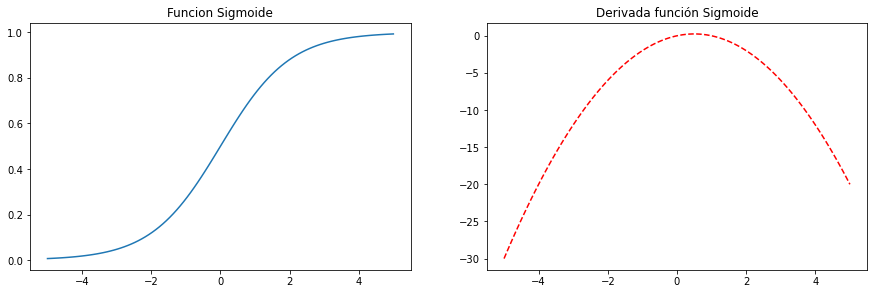

In [113]:
#Latex
display(Math(r'sigmoide(x) = \frac{1}{1+e^{-x}} '))
display(Math(r"$$sigmoide'(x) = x{(1-x)}"))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(v,sigm[0](v))
plt.title("Funcion Sigmoide")
plt.subplot(222)
plt.plot(v,sigm[1](v), "--", color="red")
plt.title("Derivada función Sigmoide")
plt.show()

### Función Tangente hiperbólica o Gaussiana
* Es una función similar a la Sigmoide pero produce salidas en escala de [-1, +1]. Además, es una función continua. En otras palabras, la función produce resultados para cada valor de x.

In [114]:
#Tangente Hiperbólica y su derivada
cosh = (lambda x: (np.e**(x) + np.e**(-x))/2) #Saco la función de coseno hiperbólico para la derivada de la tangh
tanh = (lambda x: (np.e**(x) - np.e**(-x))/(np.e**(x) + np.e**(-x)), lambda x: 1/cosh(x)**2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

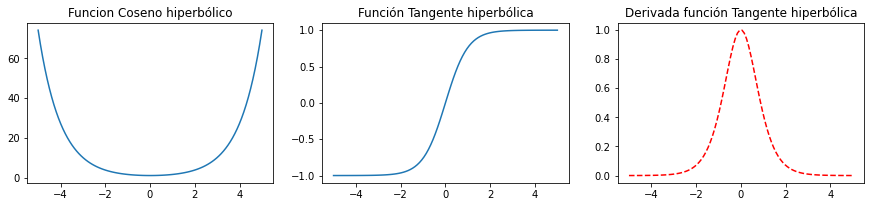

In [121]:
#Latex
display(Math(r'cosh(x) = \frac{e^{-x} + e^{-x}}{2}'))
display(Math(r'tanh(x) = \frac{e^{-x} - e^{-x}}{e^{-x} + e^{-x}} '))
display(Math(r"'tanh(x) = \frac{1}{\cosh^2{x}} "))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(331)
plt.plot(v,cosh(v))
plt.title("Funcion Coseno hiperbólico")
plt.subplot(332)
plt.plot(v,tanh[0](v))
plt.title("Función Tangente hiperbólica")
plt.subplot(333)
plt.plot(v,tanh[1](v), "--", color="red")
plt.title("Derivada función Tangente hiperbólica")
plt.savefig('images\sigmoide.png')
plt.show()

### Función RELU (Rectified Lineal Unit)
* ReLU es la función de activación más utilizada en el mundo en este momento. Desde entonces, se utiliza en casi todas las redes neuronales convolucionales o el aprendizaje profundo.
* Como puedes ver, ReLU está medio rectificado (desde abajo). f(z) es cero cuando z es menor que cero y f(z) es igual a z cuando z es superior o igual a cero.
* Es una función usada en las capas ocultas de nuestra red neuronal, NO en las de salida

In [82]:
#Relu Rectified Lineal Unit
relu = (lambda x: np.maximum(0,x), lambda x: 1. * (x > 0))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

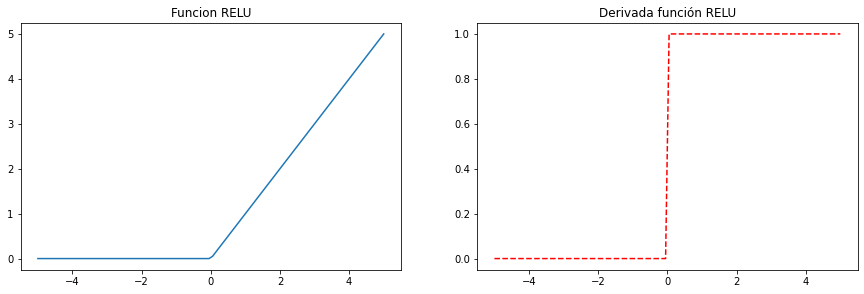

In [123]:
#Latex
display(Math(r'relu(x) = \max(0,x) '))
display(Math(r"'relu(x) = 1.(x>0) "))

v = np.linspace(-5,5,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(v,relu[0](v))
plt.title("Funcion RELU")
plt.subplot(222)
plt.plot(v,relu[1](v), "--", color="red")
plt.title("Derivada función RELU")
plt.savefig('images\sigmoide.png')
plt.show()

## ¿Como aprende nuestra red neuronal?
El paso final del ***PassForward*** es evaluar la salida predicha (Yr) contra una salida esperada (Yr).
La salida Yr es parte del conjunto de datos de entrenamiento (x, y) donde x es la entrada (como vimos en la sección anterior).
La evaluación entre Yp e Yr se realiza a través de una función de coste.
Para este ejercicio hemos usado dos funciones de coste:

* MSE (error cuadrático medio)
* Entropía cruzada.

Llamamos a esta función de costo C y la denotamos de la siguiente manera:

In [84]:
display(Math(r'C = cost(Y_p,Y_r)'))

<IPython.core.display.Math object>

Donde el ***cost*** puede ser igual a MSE, entropía cruzada o cualquier otra función de coste.
Según el valor de C, el modelo "sabe" cuánto ajustar sus parámetros (Weight y BIAS) para acercarse a la salida esperada y. 
***Esto sucede usando el algoritmo de retropropagación o tambien conocido como Backpropagation.***

## Definimos las funciones de coste y sus derivadas 
#### MSE (Error cuadratico medio)

In [85]:
mse_loss= (lambda Yp,Yr: np.mean((Yp-Yr)**2), lambda Yp,Yr: (Yp-Yr))

display(Math(r'MSE = \frac{1}{n}{\sum_{1=1}^n{(Y_i - \hat{Y_i})}^2} '))
display(Math(r"'MSE = \sum_{i=1}^n{(Y_i - \hat{Y_i})} "))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Cross entropy
* Clasificación binaria

<IPython.core.display.Math object>

C:\Users\jorge.calvo\AppData\Local\Continuum\anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\jorge.calvo\AppData\Local\Continuum\anaconda3\envs\IA\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


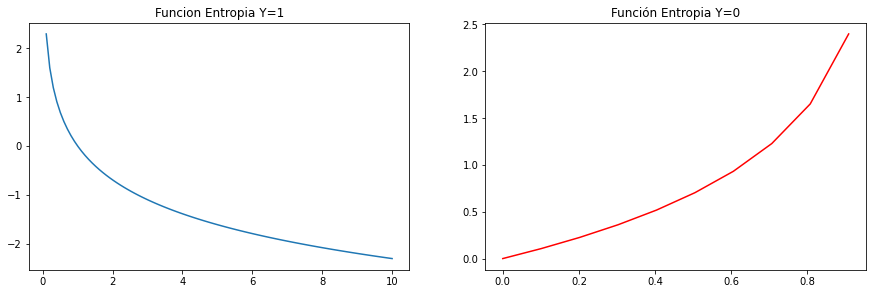

In [124]:
entropy_loss_binary= (lambda Yp: -np.log(Yp), lambda Yp: -np.log(1-Yp))

display(Math(r'H(y,P) = \begin{cases}P=1, -\log(P)\\P=0, -\log(1-P)\end{cases}'))

v = np.linspace(0,10,100)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(v,entropy_loss_binary[0](v))
plt.title("Funcion Entropia Y=1")
plt.subplot(222)
plt.plot(v,entropy_loss_binary[1](v), color="red")
plt.title("Función Entropia Y=0")
plt.savefig('images\sigmoide.png')
plt.show()

#### Estas dos expresiones podemos juntarlas en una sola para obetener una unica función de coste

In [87]:
cross_loss = (lambda Yp,Yr:-np.nanmean(Yr * np.log(Yp) + (1-Yr) * np.log(1-Yp)), 
              lambda Yp,Yr: -(np.divide(Yr,Yp)- np.divide(1-Yr, 1-Yp)))

display(Math(r'H(y,P) = -\frac{1}{n}{\sum_{1=1}^n}(y\log(P) + (1-y)\log(1-P))'))
display(Math(r"'H(y,P) =-(\frac{y}{P}-\frac{1-y}{1-P})"))    

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## BackPropagation y gradiente descendente

Backpropagation tiene como objetivo minimizar la función de coste ajustando los pesos (w) y sesgos (bias) de la red. El nivel de ajuste está determinado por los gradientes de la función de coste con respecto a esos parámetros. (derivadas)

##### La derivada de una función C mide la sensibilidad al cambio del valor de la función (valor de salida) con respecto a un cambio en su argumento x (valor de entrada). En otras palabras, la derivada nos dice en qué dirección va C.
##### El gradiente muestra cuánto debe cambiar el parámetro x (en dirección positiva o negativa) para minimizar C.

Para calcular estos gradientes usamos la tecnica de la ***Regla de la cadena***

#### Derivada de la función de Coste respecto al peso
* Se peuede expresar con la regla de la cadena, multiplicando la derivada del Coste respecto a la suma ponderada (z) por la derivada de (z) respecto al valor del peso (w)

In [88]:
display(Math(r'\frac{\partial C}{\partial w^l_{jk}} =\frac{\partial C}{\partial z^l_j}\frac{\partial z^l_j}{\partial w^l_{jk}}'))
display(Math(r'Por\ definición\ sabemos\ que\ : z^l_j=\sum_{k=1}^mw^l_{jk}a^{l-1}_{k}+b^l_{j}'))
display(Math(r'Calculando\ la\ derivada\ podemos\ decir\ que :\frac{\partial z^l_j}{\partial w^l_{jk}} =a^{l-1}_{k}'))
display(Math(r'Valor\ final :\frac{\partial C}{\partial w^l_{jk}} =\frac{\partial C}{\partial z^l_j}a^{l-1}_{k}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Derivada de la función de Coste respecto al parametro BIAS
* Se peuede expresar con la regla de la cadena, multiplicando la derivada del Coste respecto a la suma ponderada (z) por la derivada de (z) respecto al valor del BIAS (b)

In [89]:
display(Math(r'\frac{\partial C}{\partial b^l_{j}} =\frac{\partial C}{\partial z^l_j}\frac{\partial z^l_j}{\partial b^l_{j}}'))
display(Math(r'Calculando\ la\ derivada\ podemos\ decir\ que :\frac{\partial z^l_j}{\partial b^l_{j}} =1'))
display(Math(r'Valor\ final :\frac{\partial C}{\partial b^l_{j}} =\frac{\partial C}{\partial z^l_j}1'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### La parte común en ambas ecuaciones a menudo se denomina "gradiente local" y se expresa de la siguiente manera:

In [90]:
display(Math(r'\delta^l_{j} =\frac{\partial C}{\partial z^l_{j}}'))
display(Math(r'Regla\ de\ la\ cadena: \delta^l_{j} =\frac{\partial C}{\partial a^l_{j}}\frac{\partial a^l_{j}}{\partial z^l_{j}}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Computar el error de la capa anterior

In [91]:
display(Math(r'\delta^{l-1} =\delta^lw^l\frac{\partial a^{l-1}}{\partial z^{l-1}}'))

<IPython.core.display.Math object>

## Cuando ya tenemos el desarrollo de las variables parciales podemos ajustar los parametros de nuestra red

#### Actualizamos el parametro de BIAS usando el Vector Gradiente

In [125]:
display(Math(r'b_{l+1} =b_{l} - \epsilon\frac{\partial C}{\partial b}'))
display(Math(r'\epsilon = El\ ratio\ de\ aprendizaje\ (Cuanto\ nos\ deplazamos\ en\ nuestra\ función\ de\ coste\ en\ cada\ iteración)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Actualizamos el parametro de pesos usando el vector Gradiente

In [126]:
display(Math(r'w_{l+1} =w_{l} - \epsilon\frac{\partial C}{\partial w}'))
display(Math(r'\epsilon = El\ ratio\ de\ aprendizaje\ (Cuanto\ nos\ deplazamos\ en\ nuestra\ función\ de\ coste\ en\ cada\ iteración)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Realizamos este proceso interativamente hasta que conseguimos minimizar el error en nuestra función de coste.
***Algoritmo del Gradiente Descendente***

![](images/gradientdescent.gif)

### Clase para la estrutura de la red neuronal
* Creamos una clase en Python que nos permite crear una red neural de n neuronas y l capas
* Esta clase generará de forma aleatoria los valores de los pesos (W) y el del sesgo (BIAS)

In [94]:
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f=act_f
        self.b=np.random.randn(1,n_neur)
        self.w=np.random.randn(n_conn,n_neur)
    

### Creamos nuestra Red
* Creamos una función que usará la clase neural_layer para crear nuestra red neuronal
* Además a esta red le pasaremos la función de activación en las capas ocultas y en la capa de salida

In [95]:
def create_nn(topology, act_f, last_f=sigm):
    nn=[]
    for l, layer in enumerate(topology[:-1]):
        if l+1 is len(topology[:-1]): # Añadimos a la ultima capa la función de activación distinta
            nn.append(neural_layer(topology[l],topology[l+1],last_f))
        else:
            nn.append(neural_layer(topology[l],topology[l+1],act_f))   
    return nn    

## Definimos la función de entrenamiento de nuestra red

In [96]:
#Función de entrenamiento
def train(neural_net, X, Y, f_cost,lr=0.5,train=True):
    out=[(None,X)] # En este array guarda los pares de z y a [(z0,a0),(z1,a1),...]
    
    #Forward Pass
    for l, layer in enumerate(neural_net):
      
        z = np.dot(out[-1][1],neural_net[l].w) + neural_net[l].b
        a = neural_net[l].act_f[0](z)
       
        out.append((z,a))

    
    #Backpropagation and Gradient descent
    
    if train:
        delta=[]
        
        for l in reversed(range(0,len(neural_net))):
            z=out[l+1][0]
            a=out[l+1][1]
            
            #Si estamos en la ultima capa
            if l == len(neural_net) - 1:
                delta.insert(0, f_cost[1](a, Y) * neural_net[l].act_f[1](a))
            #Calculamos delta en las capas previas
            else:
                delta.insert(0,np.dot(delta[0],aux_w.T) * neural_net[l].act_f[1](a)) 
                #Cuidado con los indices de las capas, son distinos (1+) en el array Out
                
            aux_w=neural_net[l].w 
            #Lo guardamos en una variable auxiliar para poder modificar los valores al mismo tiempo usando el Gradiente descendente
                
            #Gradient Descent : Ajuste de los pesos y el valor BIAS
            neural_net[l].b = neural_net[l].b - lr * np.mean(delta[0], axis=0, keepdims=True)
            #Hago la media de los valores que tengo en el vector de Bias y con keepdims conservo su dimensión
            neural_net[l].w = neural_net[l].w - np.dot(out[l][1].T,delta[0])*lr
    return out[-1][1] 

## Entrenamos nuestra red neuronal

### Creamos el dataset
#### Make Circles
* Crear un círculo grande que contenga un círculo más pequeño en 2d.
* Un conjunto de datos simple para visualizar algoritmos de agrupamiento y clasificación.
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make%20circles#sklearn.datasets.make_circles

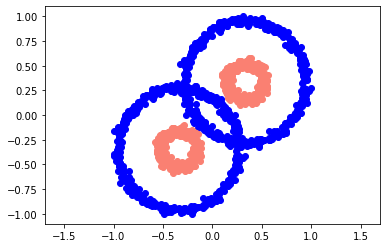

In [97]:
n=800 #número de puntos utilizados en el dataset
X, Y = make_circles(n_samples=n, noise=0.04, shuffle=True, factor=0.3)
Y = Y[:,np.newaxis] #Le genero una dimensión a los valores de Y para poder operar con ellos en train

#Creamos dos circulos para realziar un aprendizaje un poco más complejo
# Al circulo original le sumammos una constante aleatoria entre 2 y 4 para desplazarla en el eje
X=X+random.uniform(-2,4)
X_1=X+random.uniform(-2,4)

#unimos ambos arrays
Y=np.concatenate((Y,Y), axis=0)
X=np.concatenate((X,X_1),axis=0)

#Escalamos los valores entre -1 y 1
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

#Mezclamos los valores dentro del array para evitar el posible patrón de suma de la constante
state=np.random.get_state()
np.random.shuffle(X)
#Guardamos el esto aleatorio para plicarlo igual en la Y y así mantener la clasificación del circulo exterior e interior
np.random.set_state(state) 
np.random.shuffle(Y)

#Dibujamos ambos circulos
plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],color="blue")
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],color="salmon")
plt.axis("equal")
plt.show()

### Creamos la estructura de la red neuronal que aprenderá a clasificar este dataset
* ***Topology*** : Estructura de capas que tendrá nuestrad
* ***create_nn*** : Función que crea nuestra red pasando las funciones de activación (capas ocultas y capa de salida)
* ***f_loss*** : Función de perdida que usaremos (MSE ó Entropía cruzada binaria)
* ***epochs*** : Número de épocas de nuestra red, es decir, el número de veces que realzizrá la retropropagación
* ***lr*** : Ratio de aprendizaje, parametro por el cual avanza nuestro algoritmo en la función de coste

In [98]:
topology=[2,12,6,1] #Recuerda que la primera capa debe ser igual al número de clases que tienes que clasificar
neural_n=create_nn(topology,relu,sigm)
f_loss=cross_loss
epochs=1500
lr=0.0001

### Ejecutamos el entrenamiento

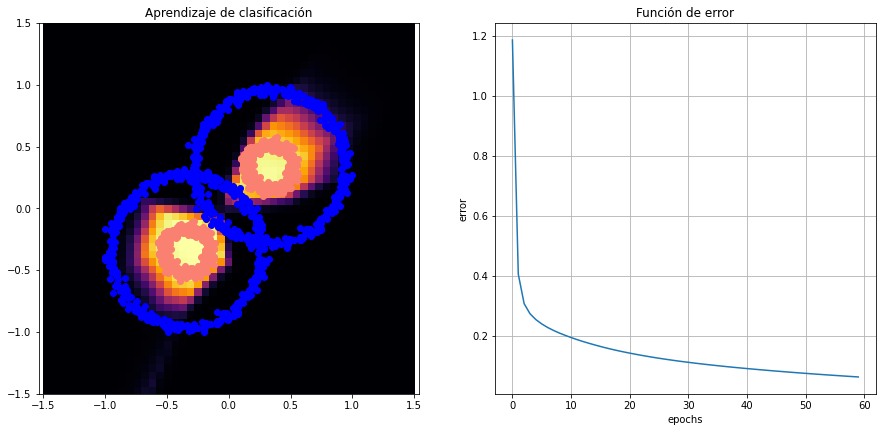

In [99]:
loss=[] #Array donde guardaremos los errores de las sucesivas interacciones

for i in range(epochs):
    pY=train(neural_n,X,Y,f_loss,lr)
    if i %25 == 0:
        loss.append(f_loss[0](pY,Y))
        
        res=50
        
        _x0 = np.linspace(-1.5,1.5, res)
        _x1 = np.linspace(-1.5,1.5, res)
        
        _Y = np.zeros((res,res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                    _Y[i0, i1] = train(neural_n, np.array([[x0,x1]]), Y, f_loss,train=False)[0][0]
        
        plt.figure(1,figsize=(15,15))
        plt.subplot(221)
        plt.title("Aprendizaje de clasificación")        
        plt.pcolormesh(_x0, _x1, _Y, cmap="inferno")
        plt.axis("equal")

        plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],color="blue")
        plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],color="salmon")
        
        clear_output(wait=True)
        plt.subplot(222)
        plt.title("Función de error")
        plt.xlabel("epochs")
        plt.ylabel("error")
        plt.grid()
        plt.plot(range(len(loss)),loss)
        plt.show()
        time.sleep(0.5)